# <p align=center>🤖 **|** Artificial Intelligence Final Project by Andrija Stanković **|** 🤖</p>

<p align=center>This is the final project for the Artifical Intelligence course, which includes a full exploratory data analysis (<strong>EDA</strong>) of a chosen dataset. </p>

## 📫 **|** Table of Contents

[ WORK IN PROGRESS]

## 📝 **|** Task ##



Some of the requirements include:

- Use a Classification model.
- Present the performance of the model.
- Change parameters in order to improve results.
- Express data using different techniques and plots.


For this EDA, I will be using the Heart Failure dataset from Kaggle with the aim to explore the dataset, and make conclusions based on the visualization of its data.

***Source:*** *https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction*


## 🩺 **|** Context

<h3>Summary:</h3>

**Cardiovascular diseases** (*CVDs*) are the leading cause of death globally, taking an estimated <u>**17.9 million**</u> lives each year. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. 

Furthermore, 80% of CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. 

Heart failure is a common event caused by CVDs and this dataset contains <a href="#attributes">11 attributes</a> that can be used to predict a possible heart disease. As people with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors) need early detection and management, a machine learning model can be extremely helpful.

### <p id="attributes">The Attributess include:</p>

- **Age:** age of the patient [years]
  
- **Sex:** sex of the patient [*M*: Male, *F*: Female]
  
- **ChestPainType:** chest pain type [*TA*: Typical Angina, *ATA*: Atypical Angina, *NAP*: Non-Anginal Pain, *ASY*: Asymptomatic]
- **RestingBP:** resting blood pressure [mm Hg]
- **Cholesterol:** serum cholesterol [mm/dl]
- **FastingBS:** fasting blood sugar [*1*: if FastingBS > 120 mg/dl, *0*: otherwise]
- **RestingECG:** resting electrocardiogram results [*Normal*: Normal, *ST*: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), *LVH*: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina:** exercise-induced angina [*Y*: Yes, *N*: No]
- **Oldpeak:** oldpeak = ST [Numeric value measured in depression]
- **ST_Slope:** the slope of the peak exercise ST segment [*Up*: upsloping, *Flat*: flat, *Down*: downsloping]
- **HeartDisease:** output class [*1*: heart disease, *0*: Normal]



## 🔬 **|** Exploratory Data Analysis


### **1. Setting up the project**


#### **1.1 Imports**

Before we can start, we must first import the required libraries and modules which will be used for this EDA, as well as import the dataset. Once we do that, we can check if everything works by using the **.head()** method which will print the first 5 instances of the data set.



In [181]:
# Imported Libraries and Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import cufflinks as cf
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


# Insight into the column data
def colInfo(column):
    print("Column Name              : \"" + column + "\"")
    print("--------------------------------")
    print("Number of Unique Values  : ", df[column].nunique())
    print("Null Values              : ", df[column].isnull().sum())
    print("Unique Values            :\n", df[column].unique())
    print("")

# Histagram for comparing a column with the target variable
def histHD(column):
    title = "Distribution of Heart Diseases by" + column
    # Histogram showing the distribution of HD by Column
    hd_Figure = px.histogram(df, x="HeartDisease",
                    color=column,
                    hover_data=df.columns,
                    title=title,
                    barmode="group")

    # Edits the X and Y Axis labels
    hd_Figure.update_layout(
        xaxis_title="Heart Disease", yaxis_title="Number of Participants"
    )

    # Shows the plot
    hd_Figure.show()


# Reads the data
df = pd.read_csv('heart.csv')

# Prints the first 5 rows of the data
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### **1.2 Missing Values**

After importing everything we need, we must check whether all of the data is easily accessible and ready to be used. We can do this by firstly checking whether there are any null or missing values, and fill them if needed. 

In [182]:
# Check if there are any null values
print("~ Number of Null Values per Column ~")
print(df.isnull().sum())


~ Number of Null Values per Column ~
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


As there are no missing values across all columns, no action is needed. 

While we are here, we can also check and see how many values are unique.

In [183]:
# Number of Unique Values
print("~ Number of Unique Values per Column ~")
print(df.nunique())

~ Number of Unique Values per Column ~
Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


#### **1.3 Datatypes**

Next, we want to check the data types of the columns and check whether all of them are usable.

In [184]:
# Prints the current data types of the columns
print("~ Current Data Types ~")
print(df.dtypes, "\n")

~ Current Data Types ~
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object 



Since some of the columns (*Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope*) hold string values in the form of 'Object', we must translate it to something that can easily be accessed/used/compared with other ones.

We can do this by creating a new column 'string_col' and assigning it to all columns that are of 'Object' data type. Afterwards, we can convert them all intro 'String' data type with the **.astype()** method.

In [185]:
# Change the object data type to Strings
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

# Prints the fixed data types of the columns
print("~ Data Types After Change~")
print(df.dtypes)

~ Data Types After Change~
Age                 int64
Sex                string
ChestPainType      string
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         string
MaxHR               int64
ExerciseAngina     string
Oldpeak           float64
ST_Slope           string
HeartDisease        int64
dtype: object


### **2. General Exploration**



#### **2.1 Basic Visualization**

Before we start diving into the analysis, it could be useful to first take a look and undestand how our dataset is constructed.

We can show some instances of the dataset through one of these functions:

In [186]:
# Shows the first x rows of the data
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [187]:
# Shows the last x rows of the data
df.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [188]:
# Shows x random rows of the data
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
683,44,F,NAP,118,242,0,Normal,149,N,0.3,Flat,0
366,61,M,ASY,150,0,0,Normal,117,Y,2.0,Flat,1
844,52,M,TA,118,186,0,LVH,190,N,0.0,Flat,0
871,61,M,NAP,150,243,1,Normal,137,Y,1.0,Flat,0


In [189]:
# Shows the indexed column names
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [190]:
# Print the number of rows and columns
print("The dataset is made up of ", df.shape[0], "observations and", df.shape[1], "columns.\n")


The dataset is made up of  918 observations and 12 columns.



Additionally, by using the **.info()** method, we can show the detailed structure of the dataset, which includes:
- the number of entities
- column names
- non-null count
- data types
- memory usage 

In [191]:
# Detailed Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


Besides this, we can also use **.describe()** method to list the statistical summary of the dataset. This lists:
- **count:** Number of instances
- **mean:** The mean (total sum of values / total count)
- **std:** Standard Deviation (square root of its variance)
- **min:** The smallest value in the category
- **x%:** The value at xth percentile (25%, 50%, 75%)
- **max:** The largest value in the category

(We can use the **.transpose()** method to switch the rows and columns which is purely done for visual purposes.)

In [192]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


#### **2.2 Target Variable Exploration**

The target variable is the variable whose values are modeled and predicted by other variables.

The target variable of this exploration is **Heart Disease** in the contex of determining whether anybody is likely to get it based on the input parameters like sex, age and others.

In [193]:
# Prints column information
colInfo("HeartDisease")

Column Name              : "HeartDisease"
--------------------------------
Number of Unique Values  :  2
Null Values              :  0
Unique Values            :
 [0 1]



As this is the crucial variable, we should first see the ratio between participants with and without Heart Disease.

In [194]:
# Prints column information
print("~ Number of Participants with Heart Disease ~")
print(df["HeartDisease"].value_counts())

# Pie plot illustrating the number of participants with heart disease
px.pie(df, names="HeartDisease", title="Heart Disease Distribution", width=500, height=500)


~ Number of Participants with Heart Disease ~
1    508
0    410
Name: HeartDisease, dtype: int64


In order to further analyize how each attribute relates to Heart Disease, the best course of action is to split them into two groups:

- **Numerical Data:** Values that can be measured.
- **Categorical Data:** Values that is divided into groups. 

#### **2.3 Numerical Data Analysis**

***Numerical data*** is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Examples can include Age, Cholesterol levels, etc.


**Grouping data:**

In [195]:
# Numerical Data Sample
numerical = df.drop(["HeartDisease"], axis=1).select_dtypes(include=np.number).columns
df[numerical].head().transpose()

,0,1,2,3,4
Age,40.0,49.0,37.0,48.0,54.0
RestingBP,140.0,160.0,130.0,138.0,150.0
Cholesterol,289.0,180.0,283.0,214.0,195.0
FastingBS,0.0,0.0,0.0,0.0,0.0
MaxHR,172.0,156.0,98.0,108.0,122.0
Oldpeak,0.0,1.0,0.0,1.5,0.0


**Statistical Summary:**

In [196]:
# Statistical Summary of Numerical Data
df[numerical].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


**Numerical Histograms:**

In [197]:
# Histogram of Numerical Data
df[numerical].iplot(kind='histogram', subplots=False, bins=60, title='Histogram of Numerical Data')


# NOTE: iPlot makes the histogram interactive, which means that each column can be viewed individually by clicking on the legend

##### **2.3.1 Correlation Matrix**

A **correlation matrix** is a table which shows correlation coefficients between variables. The purpose of it is to summarize data and see clear patterns.

Typically, a correlation matrix is “square”, with the same variables shown in the rows and columns. The below matrix shows correlations between the Heart Failure attributes. The line of 1.00s going from the top left to the bottom right is the main diagonal, which shows that each variable always perfectly correlates with itself. This matrix is symmetrical, with the same correlation is shown above the main diagonal being a mirror image of those below the main diagonal.

This can be done using the following methods:
- **.corr():** calculates correlation coefficients.
- **.imshow():** visualizes the matrix with the .corr() as input.

In [198]:
# Correlation Matrix
px.imshow(df.corr(), title="Correlation Matrix for Heart Failure Prediction")

<ipython-input-198-28974922470c>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



With the matrix in mind, we can conclude various correlations regarding ***Heart Disease***:
- It has a positive correlation with "*Oldpeak*" [**0.4039507**], "*FastingBS*" [**0.2672912**], and "*RestingBP*" [**0.107589**]. 
- It has a negative correlation with "*MaxHR*" [**-0.4004208**], and "*Cholesterol*" [**-0.2327406**].

##### **2.3.2 Box Plots**

**Box plots** visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.




In the simplest box plot the central rectangle spans the first quartile to the third quartile (*the interquartile range or IQR*).A segment inside the rectangle shows the median and “whiskers” above and below the box show the locations of the minimum and maximum.

They are very useful in showing us the concentration of values, and ***outliers*** for each attribute.

An **outlier** is an extremely high or extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values in a data graph or dataset.



In [199]:
# Statistical Summary of Numerical Data
df[numerical].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


In [200]:
# Iterate through all columns of Numerical Data and plot a box plot
for column in numerical:
    if column != "FastingBS": # FastingBS has only two type of values
        df[column].iplot(kind="box", title=column+" Box Model", boxpoints="all", yTitle="Value", color="purple")


**Box plots divided by the Target Variable:**

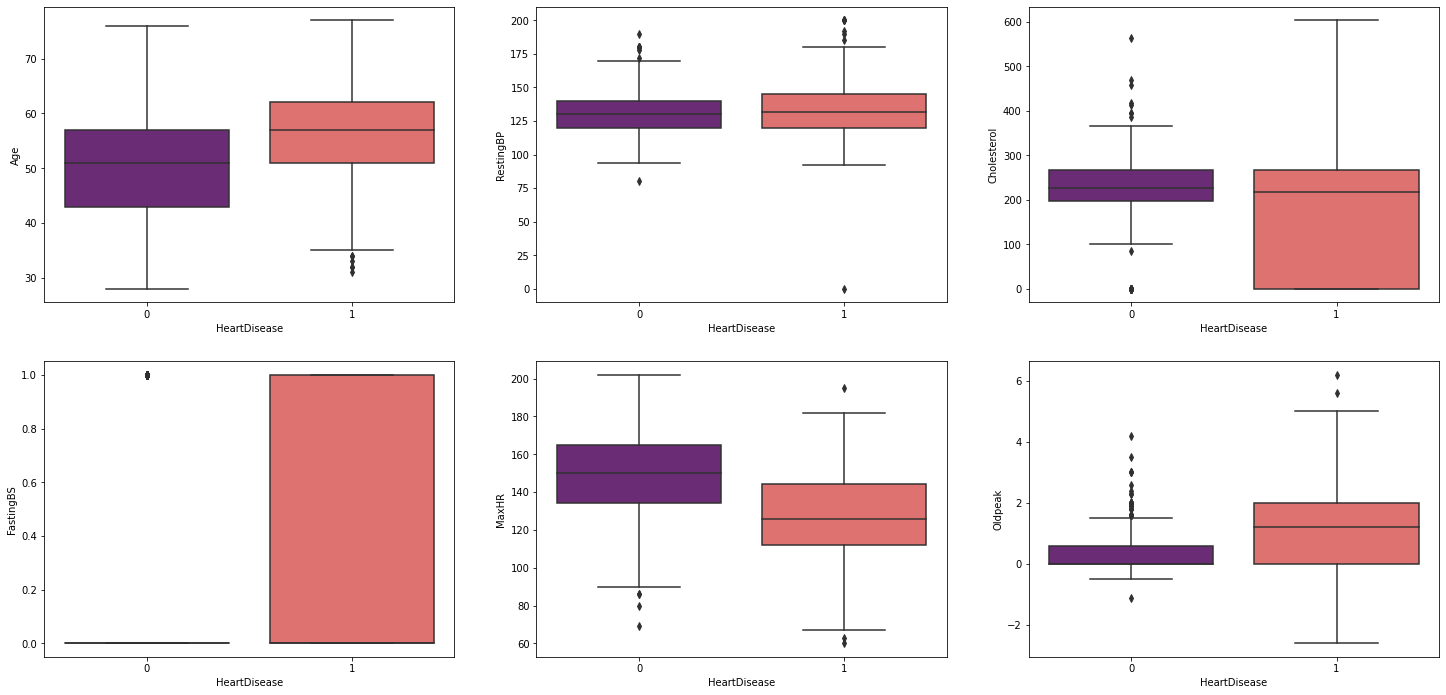

In [201]:
# Splitting each box plot to show the distribution of heart disease
index = 0
plt.figure(figsize=(25,25))
for column in numerical:
    index += 1
    plt.subplot(4, 3, index)
    sns.boxplot(x='HeartDisease', y=column, data=df, palette='magma')

#### **2.4 Categorical Data**

***Categorical data*** is a collection of information that is divided into groups. This data is called categorical because it may be grouped according to the variables present in the biodata such as sex, different chest pain types, etc. 


**Grouping data:**

In [202]:
categorical = df.select_dtypes(include="string").columns
df[categorical].head().transpose()

,0,1,2,3,4
Sex,M,F,M,F,M
ChestPainType,ATA,NAP,ATA,ASY,NAP
RestingECG,Normal,Normal,ST,Normal,Normal
ExerciseAngina,N,N,N,Y,N
ST_Slope,Up,Flat,Up,Flat,Up


**Categorical Histograms:**

In [203]:
df[categorical].iplot(kind='hist');

##### **Sex**

Out of all (*918*) participants, **78.98%** (*725*) are males and **21.02%** (*193*) are females. 

Furthermore, after comparing the relationship between Sex and Heart Disease, we can conclude:

- 458 out of 725 **Males** have a form of Heart Disease. (*63.17%*)
- 50 out of 193 **Females** have a form of Heart Disease. (*25.91%*) 


**Column Info:**

In [204]:
colInfo("Sex")

Column Name              : "Sex"
--------------------------------
Number of Unique Values  :  2
Null Values              :  0
Unique Values            :
 <StringArray>
['M', 'F']
Length: 2, dtype: string



**Variable statistics:**

In [205]:
# Variables
numMales = df[df["Sex"] == "M"].value_counts().sum()
numFemales = df[df["Sex"] == "F"].value_counts().sum()

numMales_hd = round((df[(df["Sex"] == "M") & (df["HeartDisease"] == 1)].value_counts().sum() / numMales) * 100, 2)
numFemales_hd = round((df[(df["Sex"] == "F") & (df["HeartDisease"] == 1)].value_counts().sum() / numFemales) * 100, 2)

# Prints all values
print("Males: ", numMales, "(", numMales_hd, "% have heart disease)")
print("Females: ", numFemales, "(", numFemales_hd, "% have heart disease)")

Males:  725 ( 63.17 % have heart disease)
Females:  193 ( 25.91 % have heart disease)


**Histogram with the Target Variable:**

In [206]:
histHD("Sex")

##### **Chest Pain Type**

Out of all **918** participants, **496** were asymptomatic, **203** reported non-anginal pain, **173** had atypical angina and **46** had typical angina.

After segmenting each chest pain type with the target variable, we get the following findings:

- **ASY** = 392 out of 496 (*79.03%*) have a form of Heart Disease.
- **NAP** = 72 out of 203 (*35.47%*) have a form of Heart Disease.
- **ATA** = 24 out of 173 (*13.87%*) have a form of Heart Disease.
- **TA**  = 20 out of 46 (*43.48%*) have a form of Heart Disease.


**Column Info:**

In [207]:
colInfo("ChestPainType")

Column Name              : "ChestPainType"
--------------------------------
Number of Unique Values  :  4
Null Values              :  0
Unique Values            :
 <StringArray>
['ATA', 'NAP', 'ASY', 'TA']
Length: 4, dtype: string



**Variable Statistics:**

In [208]:
# Variables
numATA = df[df["ChestPainType"] == "ATA"].value_counts().sum()
numNAP = df[df["ChestPainType"] == "NAP"].value_counts().sum()
numASY = df[df["ChestPainType"] == "ASY"].value_counts().sum()
numTA = df[df["ChestPainType"] == "TA"].value_counts().sum()

numATA_hd = round((df[(df["ChestPainType"] == "ATA") & (df["HeartDisease"] == 1)].value_counts().sum() / numATA) * 100, 2)
numNAP_hd = round((df[(df["ChestPainType"] == "NAP") & (df["HeartDisease"] == 1)].value_counts().sum() / numNAP) * 100, 2)
numASY_hd = round((df[(df["ChestPainType"] == "ASY") & (df["HeartDisease"] == 1)].value_counts().sum() / numASY) * 100, 2)
numTA_hd = round((df[(df["ChestPainType"] == "TA") & (df["HeartDisease"] == 1)].value_counts().sum() / numTA) * 100, 2)

# Prints all values
print("ATA  : ", numATA, "(", numATA_hd, "% have heart disease)")
print("NAP  : ", numNAP, "(", numNAP_hd, "% have heart disease)")
print("ASY  : ", numASY, "(", numASY_hd, "% have heart disease)")
print("TA   : ", numTA, "(", numTA_hd, "% have heart disease)")


ATA  :  173 ( 13.87 % have heart disease)
NAP  :  203 ( 35.47 % have heart disease)
ASY  :  496 ( 79.03 % have heart disease)
TA   :  46 ( 43.48 % have heart disease)


**Histogram with the Target Variable:**

In [209]:
histHD("ChestPainType")

##### **RestingECG**


Normal  :  552 ( 51.63 % have heart disease)
ST      :  178 ( 65.73 % have heart disease)
LVH     :  188 ( 56.38 % have heart disease)

**Column Info:**

In [210]:
colInfo("RestingECG")

Column Name              : "RestingECG"
--------------------------------
Number of Unique Values  :  3
Null Values              :  0
Unique Values            :
 <StringArray>
['Normal', 'ST', 'LVH']
Length: 3, dtype: string



**Variable Statistics:**

In [211]:
# Variables
numNormal = df[df["RestingECG"] == "Normal"].value_counts().sum()
numST = df[df["RestingECG"] == "ST"].value_counts().sum()
numLVH = df[df["RestingECG"] == "LVH"].value_counts().sum()

numNormal_hd = round((df[(df["RestingECG"] == "Normal") & (df["HeartDisease"] == 1)].value_counts().sum() / numNormal) * 100, 2)
numST_hd = round((df[(df["RestingECG"] == "ST") & (df["HeartDisease"] == 1)].value_counts().sum() / numST) * 100, 2)
numLVH_hd = round((df[(df["RestingECG"] == "LVH") & (df["HeartDisease"] == 1)].value_counts().sum() / numLVH) * 100, 2)

# Prints all values
print("Normal  : ", numNormal, "(", numNormal_hd, "% have heart disease)")
print("ST      : ", numST, "(", numST_hd, "% have heart disease)")
print("LVH     : ", numLVH, "(", numLVH_hd, "% have heart disease)")


Normal  :  552 ( 51.63 % have heart disease)
ST      :  178 ( 65.73 % have heart disease)
LVH     :  188 ( 56.38 % have heart disease)


**Histogram with the Target Variable:**

In [212]:
histHD("RestingECG")

### **3. Training Model**



Preprocessing

In [213]:
original = df.shape

# Gets First and Third Quartile
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)

# Finds the Interquartile Range
IQR = Q3 - Q1

# Finds the Upper and Lower Bounds
upperBound = Q3 + (1.5 * IQR)
lowerBound = Q1 - (1.5 * IQR)

# Removes outliers
df = df[~((df < lowerBound) | (df > upperBound)).any(axis=1)]

# Shows the difference 
print("Original Shape: ", original)
print("New Shape: ", df.shape)

Original Shape:  (918, 12)
New Shape:  (588, 12)


<ipython-input-213-250b63abc98d>:15: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



In [214]:
le = LabelEncoder()

# Iterates through all columns
for column in df.columns:
    # If the column is a string
    if df[column].dtype == "string":
        # Encode the column
        df[column] = le.fit_transform(df[column])


In [215]:
#sns.pairplot(df, hue="HeartDisease", palette="magma")

In [216]:
# Split data into X and y
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)



Prediction:  0.8305084745762712


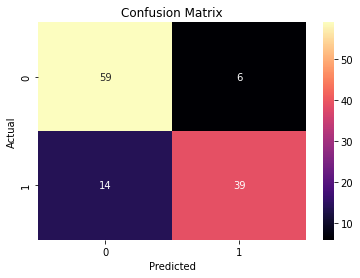

In [221]:

lrRF = LinearDiscriminantAnalysis()
lrRF.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lrRF.predict(X_test)

accuracy = (y_pred == y_test).sum() / len(y_test)

print("Prediction: ", accuracy)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="magma")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [222]:
rf = RandomForestClassifier(n_estimators=100, random_state=5)
rf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf.predict(X_test)

accuracy = (y_pred == y_test).sum() / len(y_test)

print("Prediction: ", accuracy)


Prediction:  0.864406779661017


## 🪪 **|** Citations & Acknowledgements

The dataset used was created by Fedesoriano, and was taken from Kaggle. 

(https://www.kaggle.com/fedesoriano/heart-failure-prediction)

***Additional information:***

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

    Cleveland: 303 observations
    Hungarian: 294 observations
    Switzerland: 123 observations
    Long Beach VA: 200 observations
    Stalog (Heart) Data Set: 270 observations

Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/



# <p align=center>**Andrija Stanković | 2020230164**</p>
